# Image Preprocessing Development/Sandbox


In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.path.expanduser("~"),"Desktop","projects", "GlacierView",
                                "src","segmentation","helpers"))
import read, preprocess, explore
from importlib import reload
reload(preprocess)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import pandas as pd

In [2]:
#data directories
data_label = "localized_time_series_for_training_c02_t1_l2"
glacier_view_dir = os.path.join(os.path.expanduser('~'),"Desktop","projects","GlacierView")
glaciers_dir = os.path.join(glacier_view_dir,"src","earth_engine","data","ee_landing_zone",data_label, "landsat")

#params
common_bands = ['blue','green','red','nir']
dim = (128,128)
percentile = 50

## Examples of random training data images

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
/Users/mattw/Desktop/projects/GlacierView/src/earth_engine/data/ee_landing_zone/localized_time_series_for_training_c02_t1_l2/landsat/G086610E27755N/G086610E27755N_2009-12-18_L5_C02_T1_L2_SR.tif


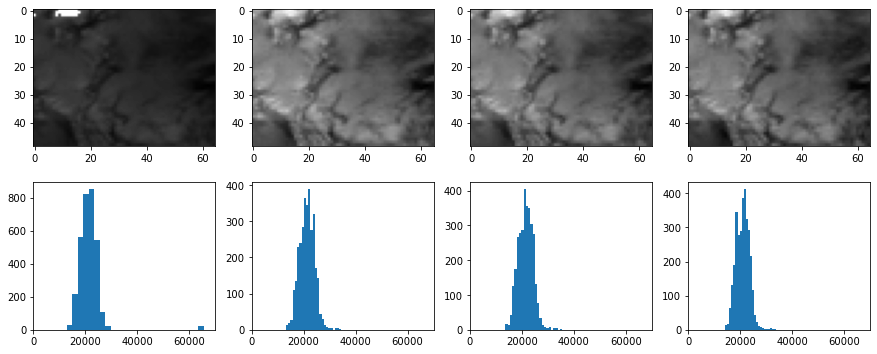

- - - - - - - - - - - PREPROCESSED - - - - - - - - - - -


NameError: name 'torchvision' is not defined

In [3]:
n_samples = 50
n_bins = 25

glims_ids = random.sample(os.listdir(glaciers_dir), n_samples)
images = {} 
masks = {}
for glims_id in glims_ids:
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    images[glims_id] = read.get_rasters(os.path.join(glaciers_dir,glims_id))
    example_tif = random.choice(list(images[glims_id].keys()))
    print(os.path.join(glaciers_dir,glims_id,example_tif))
    fig, ax = plt.subplots(2,4, figsize = (15,6))
    plt.set_cmap("gray")
    img = images[glims_id][example_tif]
    ax[0,0].imshow(img[:,:,0])
    ax[0,1].imshow(img[:,:,1])
    ax[0,2].imshow(img[:,:,2])
    ax[0,3].imshow(img[:,:,3])
    
    ax[1,0].set_xlim((0,70_000))
    ax[1,0].hist(img[:,:,0].flatten(), bins = n_bins)
    ax[1,1].set_xlim((0,70_000))
    ax[1,1].hist(img[:,:,1].flatten(), bins = n_bins)
    ax[1,2].set_xlim((0,70_000))
    ax[1,2].hist(img[:,:,2].flatten(), bins = n_bins)
    ax[1,3].set_xlim((0,70_000))
    ax[1,3].hist(img[:,:,3].flatten(), bins = n_bins)
    
    plt.show()
    
    print("- - - - - - - - - - - PREPROCESSED - - - - - - - - - - -")
    
    images[glims_id] = read.get_rasters(os.path.join(glaciers_dir,glims_id))
        
    images[glims_id] = preprocess.get_common_bands(images[glims_id],common_bands)
    images[glims_id] = preprocess.normalize_rasters(images[glims_id])
    images[glims_id] = preprocess.resize_rasters(images[glims_id],dim)
    
    
    fig, ax = plt.subplots(2,4, figsize = (15,6))
    plt.set_cmap("gray")
    img = images[glims_id][example_tif]
    ax[0,0].imshow(img[:,:,0])
    ax[0,1].imshow(img[:,:,1])
    ax[0,2].imshow(img[:,:,2])
    ax[0,3].imshow(img[:,:,3])
    
    ax[1,0].set_xlim((0,1))
    ax[1,0].hist(img[:,:,0].flatten(), bins = n_bins)
    ax[1,1].set_xlim((0,1))
    ax[1,1].hist(img[:,:,1].flatten(), bins = n_bins)
    ax[1,2].set_xlim((0,1))
    ax[1,2].hist(img[:,:,2].flatten(), bins = n_bins)
    ax[1,3].set_xlim((0,1))
    ax[1,3].hist(img[:,:,3].flatten(), bins = n_bins)
    
    
    plt.show()


## Examples of query result training data images

In [7]:
metadata_dir = os.path.join(glacier_view_dir,"src","earth_engine","data","processed_metadata",data_label)
df = pd.read_csv(os.path.join(metadata_dir,"filtered_training_data.csv"))

## Playground for developing the best preprocessing method

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
/Users/mattw/Desktop/projects/GlacierView/src/earth_engine/data/ee_landing_zone/localized_time_series_for_training_c02_t1_l2/landsat/G076336E33701N/G076336E33701N_2007-10-10_L7_C02_T1_L2_SR.tif


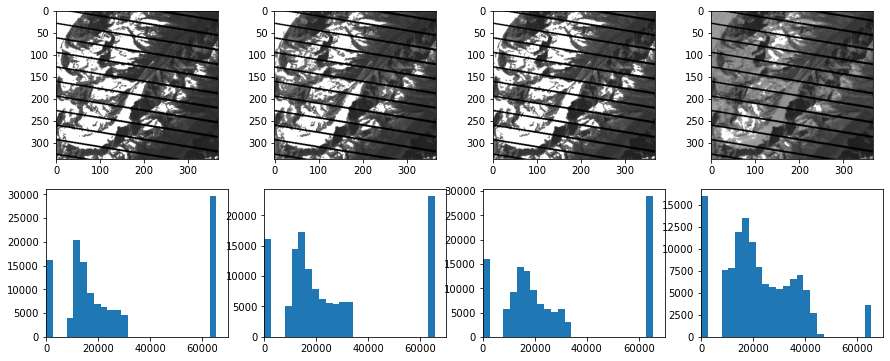

- - - - - - - - - - - PREPROCESSED - - - - - - - - - - -


NameError: name 'torchvision' is not defined

In [8]:
n_samples = 50
n_bins = 25

glims_ids = ['G076336E33701N', 'G277921E80969N', 'G071284E36211N', 'G082962E30869N']
corresponding_tif = ['G076336E33701N_2007-10-10_L7_C02_T1_L2_SR.tif',
                    'G277921E80969N_2015-08-30_L8_C02_T1_L2_SR.tif', 
                     'G071284E36211N_2006-09-01_L7_C02_T1_L2_SR.tif',
                    'G082962E30869N_2009-11-05_L5_C02_T1_L2_SR.tif']
images = {} 
masks = {}
i = 0
for glims_id in glims_ids:
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    images[glims_id] = read.get_rasters(os.path.join(glaciers_dir,glims_id))
    example_tif = corresponding_tif[i]
    i+=1
    print(os.path.join(glaciers_dir,glims_id,example_tif))
    fig, ax = plt.subplots(2,4, figsize = (15,6))
    plt.set_cmap("gray")
    img = images[glims_id][example_tif]
    ax[0,0].imshow(img[:,:,0])
    ax[0,1].imshow(img[:,:,1])
    ax[0,2].imshow(img[:,:,2])
    ax[0,3].imshow(img[:,:,3])
    
    ax[1,0].set_xlim((0,70_000))
    ax[1,0].hist(img[:,:,0].flatten(), bins = n_bins)
    ax[1,1].set_xlim((0,70_000))
    ax[1,1].hist(img[:,:,1].flatten(), bins = n_bins)
    ax[1,2].set_xlim((0,70_000))
    ax[1,2].hist(img[:,:,2].flatten(), bins = n_bins)
    ax[1,3].set_xlim((0,70_000))
    ax[1,3].hist(img[:,:,3].flatten(), bins = n_bins)
    
    plt.show()
    
    print("- - - - - - - - - - - PREPROCESSED - - - - - - - - - - -")
    
    images[glims_id] = read.get_rasters(os.path.join(glaciers_dir,glims_id))
        
    images[glims_id] = preprocess.get_common_bands(images[glims_id],common_bands)
    images[glims_id] = preprocess.normalize_rasters(images[glims_id])
    images[glims_id] = preprocess.resize_rasters(images[glims_id],dim)
    
    
    fig, ax = plt.subplots(2,4, figsize = (15,6))
    plt.set_cmap("gray")
    img = images[glims_id][example_tif]
    ax[0,0].imshow(img[:,:,0])
    ax[0,1].imshow(img[:,:,1])
    ax[0,2].imshow(img[:,:,2])
    ax[0,3].imshow(img[:,:,3])
    
    ax[1,0].set_xlim((0,1))
    ax[1,0].hist(img[:,:,0].flatten(), bins = n_bins)
    ax[1,1].set_xlim((0,1))
    ax[1,1].hist(img[:,:,1].flatten(), bins = n_bins)
    ax[1,2].set_xlim((0,1))
    ax[1,2].hist(img[:,:,2].flatten(), bins = n_bins)
    ax[1,3].set_xlim((0,1))
    ax[1,3].hist(img[:,:,3].flatten(), bins = n_bins)
    
    
    plt.show()
